# Decision Tree

## Pros

* Interpretable!
* makes very little assumption on the data (and hence very little preprocessing needed)

## Cons

* Prone to overfitting -- what is overfitting?

sklearn : [Decision Tree](http://scikit-learn.org/stable/modules/tree.html) has good information on the detailed pros/cons

## Key idea 

* partitions the high dimensional space (spanned by the data points) greedily 
* one dimension at a time using a splitting criterion 
* into usually two partitions
* recursively do the same on each of the partitions
* stop the splitting when some stopping criteria is met (e.g., partition is pure, only one data point left in the partition).

Example with 2D data points below.

Space | Tree
- | -
<img src="https://lipyeow.github.io/cis705f18/morea/linearalgebra/dt1.png" alt="decision tree space partitioning" width="400">|<img src="https://lipyeow.github.io/cis705f18/morea/linearalgebra/dt2.png" alt="decision tree" width="400">

Good for classification problems. How can it be used for regression problems?

[Cubist Trees](https://medium.com/convoy-tech/the-best-of-both-worlds-linear-model-trees-7c9ce139767d)
[Cubist s/w](https://www.rulequest.com/cubist-info.html)



In [2]:
# Load data first

import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree 

%matplotlib inline

# reads a csv file ignoring the first header row
# convert all fields to int
# returns a numpy array
def readCSV(fname):
    hdr=[]
    with open(fname, newline='') as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in csvdata:
            if i>0:
                data.append([int(col) for col in row])
            elif i==0:
                hdr=row
                print([x for x in enumerate(hdr)])
            i = i+1
    return hdr, np.asarray(data)

hdr, fcdata = readCSV('train.csv')

[(0, 'Id'), (1, 'Elevation'), (2, 'Aspect'), (3, 'Slope'), (4, 'Horizontal_Distance_To_Hydrology'), (5, 'Vertical_Distance_To_Hydrology'), (6, 'Horizontal_Distance_To_Roadways'), (7, 'Hillshade_9am'), (8, 'Hillshade_Noon'), (9, 'Hillshade_3pm'), (10, 'Horizontal_Distance_To_Fire_Points'), (11, 'Wilderness_Area1'), (12, 'Wilderness_Area2'), (13, 'Wilderness_Area3'), (14, 'Wilderness_Area4'), (15, 'Soil_Type1'), (16, 'Soil_Type2'), (17, 'Soil_Type3'), (18, 'Soil_Type4'), (19, 'Soil_Type5'), (20, 'Soil_Type6'), (21, 'Soil_Type7'), (22, 'Soil_Type8'), (23, 'Soil_Type9'), (24, 'Soil_Type10'), (25, 'Soil_Type11'), (26, 'Soil_Type12'), (27, 'Soil_Type13'), (28, 'Soil_Type14'), (29, 'Soil_Type15'), (30, 'Soil_Type16'), (31, 'Soil_Type17'), (32, 'Soil_Type18'), (33, 'Soil_Type19'), (34, 'Soil_Type20'), (35, 'Soil_Type21'), (36, 'Soil_Type22'), (37, 'Soil_Type23'), (38, 'Soil_Type24'), (39, 'Soil_Type25'), (40, 'Soil_Type26'), (41, 'Soil_Type27'), (42, 'Soil_Type28'), (43, 'Soil_Type29'), (44, '

## Splitting Criteria

### Notion of Purity of a Partition

purity = fraction of points in the partition with the majority class label.

E.g. What is the purity of the partition with the labels {1, 1, 1, 2, 2, 2, 2, 3, 3}?

Intuitively, we want the decision tree to split the data points into two partitions that are "pure".

### Entropy

* Entropy is a measure of "uncertainty" and you can think of the units as bits per label. 
* aka "Information"
* High entropy = high uncertainty => a partition is very impure (high uncertainty about the labels)
* Low entropy = low uncertainty => a partition is very pure (no uncertainty about the labels)
* For a data partition D with points associated with class labels $\{c_1, c_2, ..., c_k\}$, entropy is formulated by Claude Shannon as

$H(D) = -\sum_{i=1}^{k} P(c_i) \log_2 P(c_i)$

Use [scipi.stats.entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) to compute the entropy.

Entropy of this forest cover type distribution (bits per symbol):
1.94591014906


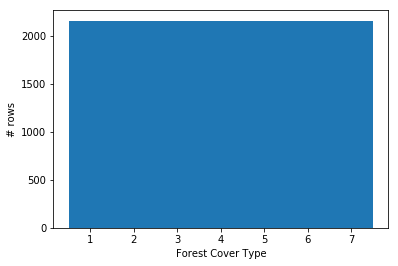

In [3]:
from collections import Counter
import scipy as sc

def plotHistogram (fct):
    histogram = Counter(fct)

    # sanity check
    #print([fc for fc in histogram.keys()])

    print('Entropy of this forest cover type distribution (bits per symbol):')
    print(sc.stats.entropy([cnt for cnt in histogram.values()])) 
    plt.bar([fc for fc in histogram.keys()],histogram.values(),1)
    plt.xlabel('Forest Cover Type')
    plt.ylabel('# rows')

plotHistogram(fcdata[:,55])
plt.show()

### Calculate the entropy after splitting on some value of elevation

* Try splitting the data on some value of elevation
* Print the entropy of the labels in each partition
* Plot each the label distribution of each partition

Entropy of this forest cover type distribution (bits per symbol):
1.19638304009
Entropy of this forest cover type distribution (bits per symbol):
1.63626279006


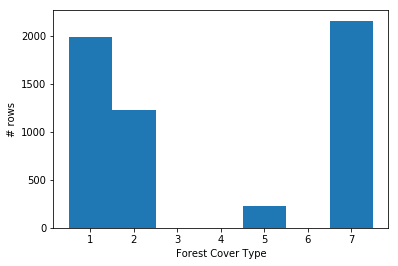

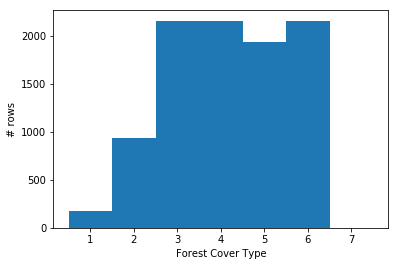

In [4]:
# this is numpy way of doing a SQL WHERE filtering
elevationsplitval = 2900
x1 = fcdata[fcdata[:,1]>elevationsplitval]
x2 = fcdata[fcdata[:,1]<=elevationsplitval]

plt.figure()
plotHistogram(x1[:,55])
plt.figure()
plotHistogram(x2[:,55])
plt.show()

### Information Gain

We want a split to reduce the uncertainty, i.e., the entropy, of the data being split. What is a reasonable way to combine the entropy of the partitions after splitting?


### Gini Index

Defined as

$G(D) = 1 - \sum_{i=1}^{k} P(c_i)^2 $

### Task: Write a function that Calculates the Gini Index

The input to the function should be a 1D array of labels

Use the function you wrote to answer the following:

* If the partition is pure, what would the distribution of $c_i$'s look like? What would the Gini index be?
* If the partition is impure, what would the distribution of $c_i$'s look like? What would the Gini index be?

For more explanation on the derivation of the Gini index, see this [quora page](https://www.quora.com/What-is-the-interpretation-and-intuitive-explanation-of-Gini-impurity-in-decision-trees)

In [5]:
def gini(x):
    
    return

print('Gini of data before splitting:')

print('Gini of x1:')

print('Gini of x2:')


Gini of data before splitting:
Gini of x1:
Gini of x2:


### The CART measure

Classification and regression trees (CART) measure:

$CART(D_y,D_n) = 2\frac{n_y}{n}\frac{n_n}{n} \sum_{i=1}^{k} | P(c_i|D_y) - P(c_i|D_n) |$

where $\{D_y,D_n\}$ denote the partitions after splitting and their sizes are $\{n_y, n_n\}$ respectively. The total number of points before splitting is $n$. The set of labels are $\{c_1, c_2, ..., c_k\}$. 

Homework: try writing writing a function to implement the CART measure.

## What is overfitting?

* specialized the model to the training data that it no longer generalizes well to future/unseen data
* model became too big, i.e., too many parameters. E.g., the decision tree is too big.

Principle of Occam's Razor: the simpler model/explanation is better.

## Controlling for overfitting

* Construct tree incrementally.
* Use the options: max_depth, min_samples_leaf, min_samples_split etc.

In [ ]:
X = fcdata[:,1:55]
y = fcdata[:,55]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Are decision trees vulnerable to the curse of dimensionality?